In [1]:
# from __future__ import print_function
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets
import io
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from sklearn.preprocessing import normalize

from matplotlib import gridspec
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import optimize
%matplotlib inline


In [2]:
path= "C:/Users/Yoshi Hirata/Documents/edhirata/UCSC/Tutorials/data"
file= "log3"
extension= ".csv"
filename=file + extension
file_path= os.path.join(path,filename)
print(file_path)
data = pd.read_csv(file_path)
print(data)

C:/Users/Yoshi Hirata/Documents/edhirata/UCSC/Tutorials/data\log3.csv
         C1      C2      C3      C4      C5      C6      C7      C8      C9  \
0    1184.0  1115.0  1241.0  1217.0  1212.0  1138.0  1194.0  1145.0  1143.0   
1    1168.0  1178.0  1206.0  1172.0  1223.0  1151.0  1144.0  1150.0  1211.0   
2    1232.0  1119.0  1109.0  1215.0  1208.0  1188.0  1239.0  1131.0  1158.0   
3    1216.0  1161.0  1164.0  1135.0  1167.0  1252.0  1250.0  1093.0  1086.0   
4    1152.0  1150.0  1191.0  1152.0  1163.0  1192.0  1171.0  1200.0  1226.0   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
696  1104.0  1158.0  1184.0  1251.0  1167.0  1177.0  1200.0  1127.0  1263.0   
697  1216.0  1101.0  1148.0  1169.0  1116.0  1253.0  1139.0  1215.0  1166.0   
698  1216.0  1121.0  1233.0  1181.0  1208.0  1146.0  1187.0  1090.0  1135.0   
699  1280.0  1114.0  1131.0  1247.0  1230.0  1100.0  1138.0  1160.0  1113.0   
700  1120.0  1143.0  1127.0  1152.0  1206.0  1113.0  1093.0  

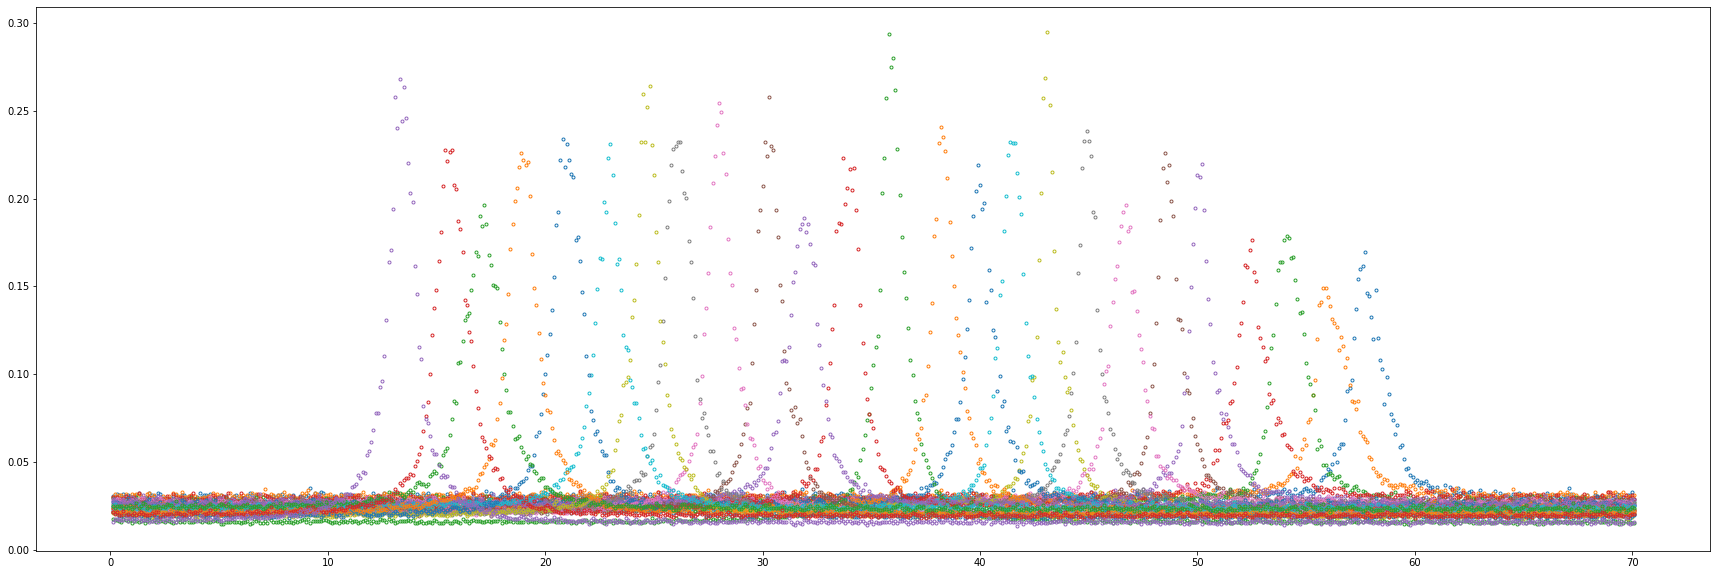

In [3]:
# x= data.Slice
# y= data.Slice.to_numpy()
# print(data.columns)
fig = plt.figure(figsize=(30,10))
ax = plt.gca()
# ax.set_ylim([0.0375,0.046])

x=np.arange(1,len(data.iloc[:, 0])+1)

for i in range(1,26):
    y=data["C"+str(i)]/np.linalg.norm(data["C"+str(i)])
    plt.plot(x*0.1,y,marker='.',linestyle = 'None', markerfacecolor='None')

In [4]:
#Create the model (Gaussian)
# Added an offset so that the gaussian can be fit better to the plot. Specially since plot is not centered around zero
def gaussian(x,a,mean,sigma,offset):
    return a*np.exp(-(x-mean)**2/(2*sigma**2))+offset


In [15]:
#Example dataset Points
x=np.arange(1,len(data.iloc[:, 0])+1)-35.0
C19_data=data.C19
# print(C19_data)
yn=data.C19/np.linalg.norm(data.C19)

#Weighted arigthmetic mean
mean = sum(x*yn)/sum(yn)         
sigma = np.sqrt(sum(yn*(x-mean)**2)/sum(yn))  

popt, cov = curve_fit(gaussian, x, yn,p0=[max(yn),mean,sigma,0.0])
stdevs = np.sqrt(np.diag(cov))
FWHM = 2.35482 * sigma

gauss_peak= gaussian(x, *popt) #Store the peak
print(max(yn), mean, sigma)

0.26439852990326085 290.4963629084296 182.68490505285007


In [16]:
# this cell prints the fitting parameters with their errors
print("amplitude = %0.2f (+/-) %0.2f" % (popt[0], stdevs[0]))
print("center = %0.2f (+/-) %0.2f" % (popt[1], stdevs[1]))
print("sigma = %0.2f (+/-) %0.2f" % (popt[2], stdevs[2]))


amplitude = -0.01 (+/-) 0.00
center = 39.73 (+/-) 24.81
sigma = 53.65 (+/-) 28.86


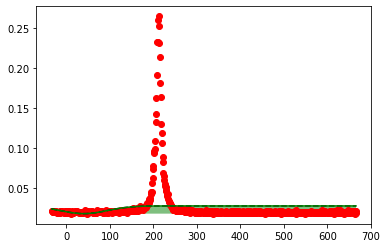

In [17]:
plt.plot(x, yn,'ro')
plt.plot(x, gaussian(x, *popt),'k--')
#Fill the curve under each Gaussian Curve
plt.plot(x, gauss_peak, "g")
plt.fill_between(x, gauss_peak.min(), gauss_peak, facecolor="green", alpha=0.5)
  

In [8]:
# Calculate the residuals
# res = yn- (x*np.power(x, *popt))

C1
amplitude = 0.12 (+/-) 0.00
center = 22.80 (+/-) 0.01
sigma = 0.80 (+/-) 0.01
C2
amplitude = 0.11 (+/-) 0.00
center = 21.17 (+/-) 0.01
sigma = -0.89 (+/-) 0.01
C3
amplitude = 0.14 (+/-) 0.00
center = 19.20 (+/-) 0.00
sigma = 0.77 (+/-) 0.01
C4
amplitude = 0.12 (+/-) 0.00
center = 17.47 (+/-) 0.01
sigma = -0.84 (+/-) 0.01
C5
amplitude = 0.17 (+/-) 0.00
center = 15.14 (+/-) 0.01
sigma = -0.57 (+/-) 0.01
C6
amplitude = 0.18 (+/-) 0.00
center = 13.65 (+/-) 0.01
sigma = 0.59 (+/-) 0.01
C7
amplitude = 0.15 (+/-) 0.00
center = 11.67 (+/-) 0.01
sigma = 0.74 (+/-) 0.01
C8
amplitude = -0.01 (+/-) 0.00
center = 27.44 (+/-) 2.64
sigma = -5.55 (+/-) 3.08
C9
amplitude = 0.22 (+/-) 0.00
center = 8.10 (+/-) 0.01
sigma = -0.49 (+/-) 0.01
C10
amplitude = 0.20 (+/-) 0.00
center = 6.50 (+/-) 0.00
sigma = 0.63 (+/-) 0.00
C11
amplitude = 0.16 (+/-) 0.00
center = 5.00 (+/-) 0.01
sigma = -0.70 (+/-) 0.01
C12
amplitude = 0.19 (+/-) 0.00
center = 3.33 (+/-) 0.01
sigma = -0.64 (+/-) 0.01
C13
amplitude = 0.24 

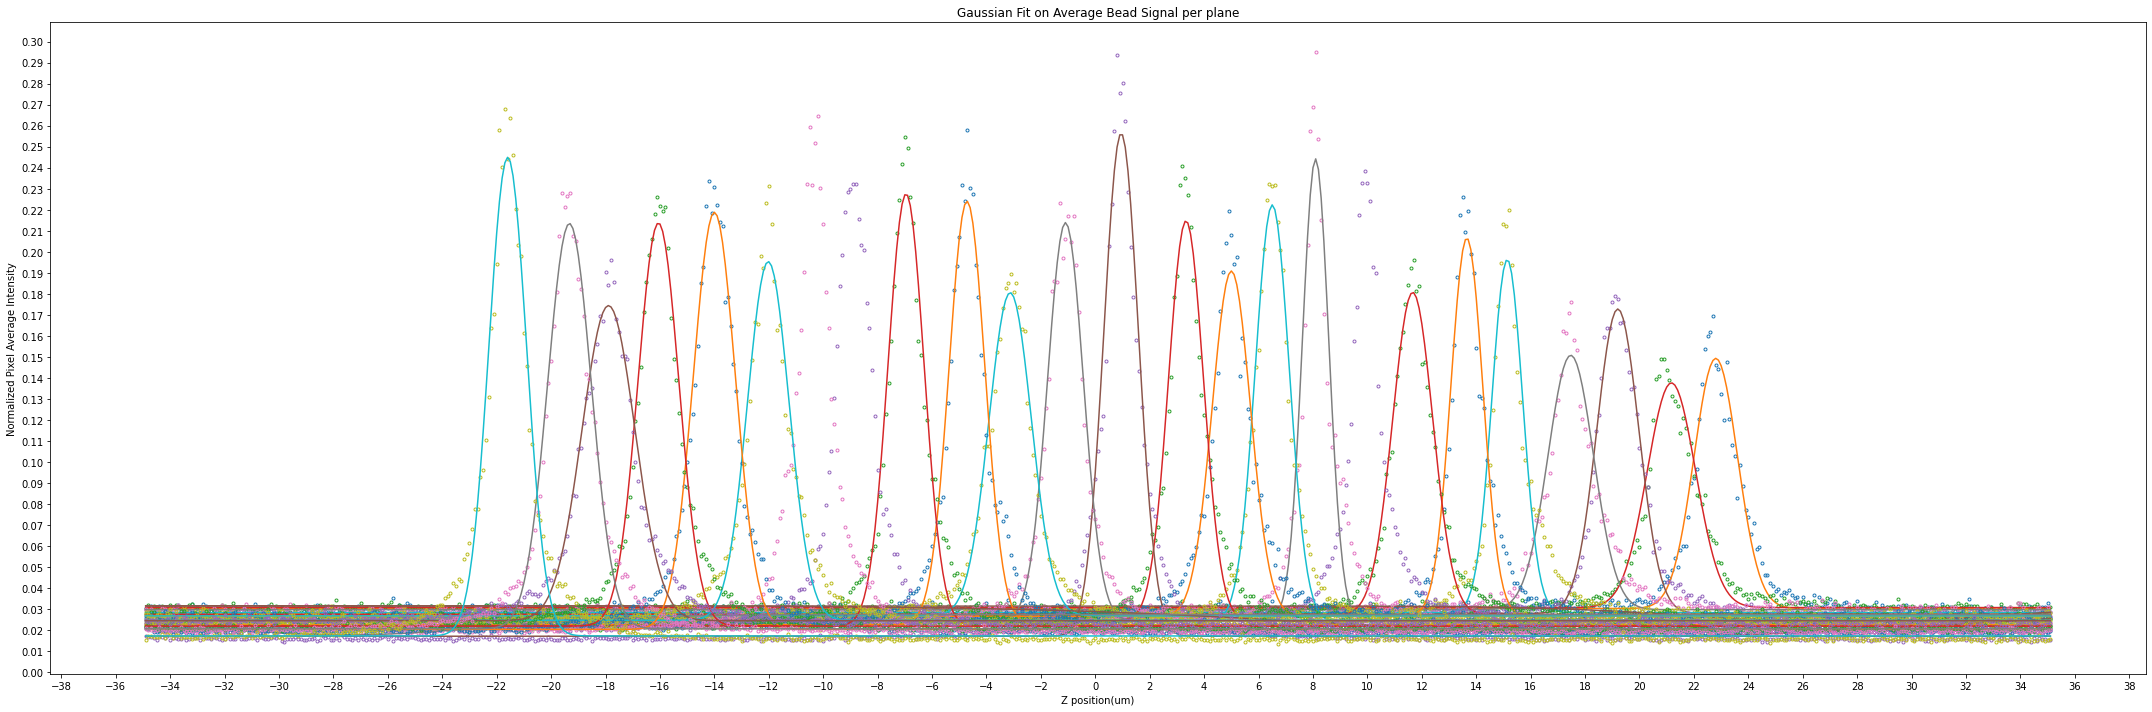

In [14]:
fig= plt.figure(figsize=(30,10))
ax1=plt.gca()
# ax.set_ylim([0.0355,0.046])

gauss_peak=[]
zstep = 0.1 #zstep of the acquisition. Bead samples were mostly at 0.1um steps (100nm)
# x=data.iloc[:, 0] * zstep-35.0
x=np.arange(1,len(data.iloc[:, 0])+1)*zstep-35.0
for i in range(1,26):
    y=data["C"+str(i)]/np.linalg.norm(data["C"+str(i)])
    
    #Weighted arigthmetic mean
    mean = sum(x*y)/sum(y)         
    sigma = np.sqrt(sum(y*(x-mean)**2)/sum(y))  
    popt, cov = curve_fit(gaussian, x, y,p0=[max(y),mean,sigma,0.0])
    stdevs = np.sqrt(np.diag(cov))
    
    
    # this cell prints the fitting parameters with their errors
    print("C"+str(i))
    print("amplitude = %0.2f (+/-) %0.2f" % (popt[0], stdevs[0]))
    print("center = %0.2f (+/-) %0.2f" % (popt[1], stdevs[1]))
    print("sigma = %0.2f (+/-) %0.2f" % (popt[2], stdevs[2]))
    
    gauss_peak.append(popt[1])
    plt.plot(x,y,marker='.',linestyle = 'None', markerfacecolor='None')
    plt.plot(x, gaussian(x, *popt))

plt.title("Gaussian Fit on Average Bead Signal per plane")
plt.xlabel("Z position(um)")
plt.ylabel("Normalized Pixel Average Intensity")
ax1.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
fig.tight_layout()
fig.savefig(file+"_beadPerPlaneGauss.png", format="png",dpi=1000)


In [10]:
def linear(x, m, b):
    return m*x + b

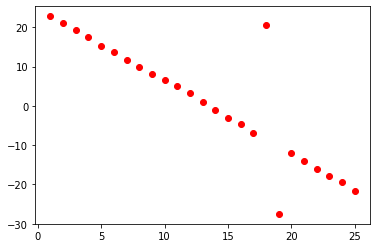

In [11]:
x1=range(1,26)
fig= plt.figure()
plt.plot(x1,gauss_peak,'ro')

slope=-1.82 (+/-) 0.19
y-intercept = 24.85 (+/-) 2.89


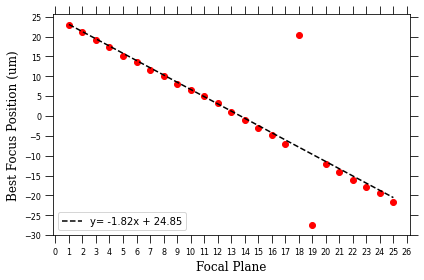

In [12]:
# using the scipy library to fit the x- and y-axis data 
# p0 is where you give the function guesses for the fitting parameters
# this function returns:
#   popt_linear: this contains the fitting parameters
#   pcov_linear: estimated covariance of the fitting paramters
popt_linear, pcov_linear = curve_fit(linear, x1, gauss_peak, p0=[((400-100)/(10-25)), 0])
# we then can find the error of the fitting parameters
# from the pcov_linear array
perr_linear = np.sqrt(np.diag(pcov_linear))

print("slope=%0.2f (+/-) %0.2f"%(popt_linear[0], perr_linear[0]))
print ("y-intercept = %0.2f (+/-) %0.2f" %(popt_linear[1], perr_linear[1]))

fig = plt.figure()
ax1=plt.gca()
x1=range(1,26)
plt.plot(x1,gauss_peak,'ro')
ax1.plot(x1, linear(x1, *popt_linear), 'k--', label="y= %0.2fx + %0.2f" % (popt_linear[0], popt_linear[1]))

ax1.set_xlabel("Focal Plane",family="serif",  fontsize=12)
ax1.set_ylabel("Best Focus Position (um)",family="serif",  fontsize=12)

ax1.legend(loc='best')
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(5))

ax1.xaxis.set_minor_locator(AutoMinorLocator(1))
ax1.yaxis.set_minor_locator(AutoMinorLocator(1))

ax1.tick_params(axis='both',which='major', direction="out", top="on", right="on", bottom="on", length=8, labelsize=8)
ax1.tick_params(axis='both',which='minor', direction="out", top="on", right="on", bottom="on", length=5, labelsize=8)

fig.tight_layout()
fig.savefig(file+"linearFit.png", format="png",dpi=1000)

In [13]:
# uploader = widgets.FileUpload(accept='',multiple=False)
# display(uploader)
# uploaded_filename = next(iter(uploader.value))
# print(uploaded_filename)
# content = uploader.value[uploaded_filename]['content']
# print(content)
# # uploaded_file["content"]
# pd.read_csv(io.BytesIO(uploaded_filename["content"]))
# https://medium.com/analytics-vidhya/python-data-projects-data-analysis-ui-reinforced-by-ipywidgets-d680493464b8